<a href="https://colab.research.google.com/github/Doyinsoextra/Doyinsoextra/blob/main/FinalProject_OgunseyeDeborahAdedoyin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Vizualization on Employee Attrition**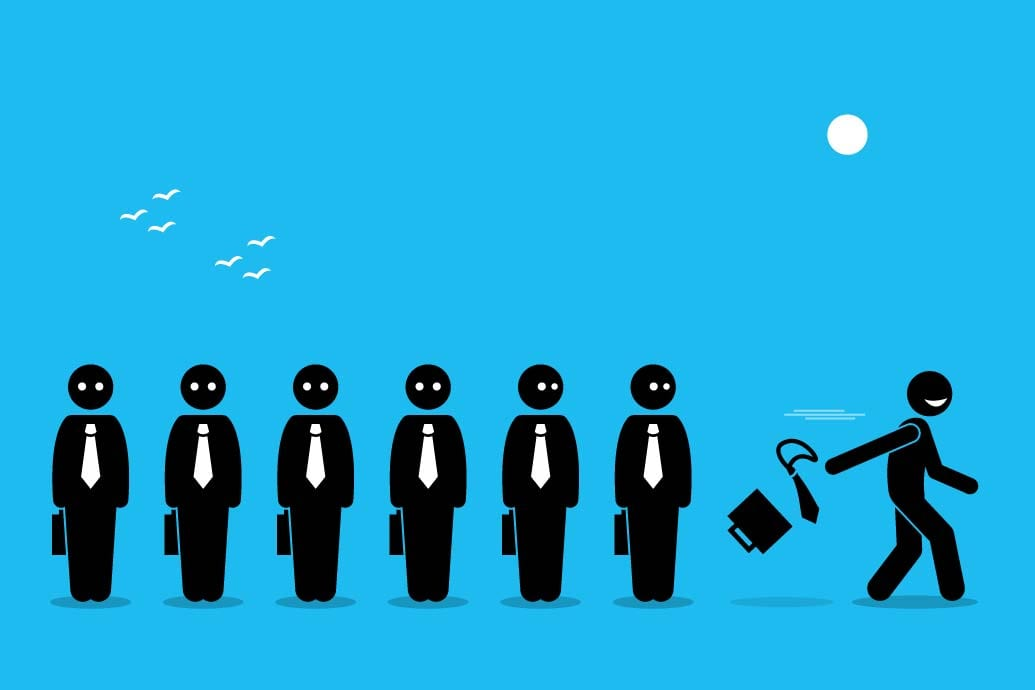

**TABLE OF CONTENT**

1. OVERVIEW OF DATASET
> 1.1 Description
2. IMPORT RELEVANT LIBRARIES
> 2.1 Import Libraries
<BR> 2.2 Load Data Set
3. EXPLORATORY DATA ANALYSIS
>3.1 Data Cleaning <BR> 3.2 Data Vizualization

#1.  **Overview on  Dataset**

This is about employee attrition which means 'the process of reducing employees in an organization whether voluntary or involuntary' and below are some relevant dictionaries to enable further understanding of the data:


    "education": {
        "1": "Below College",
        "2": "College",
        "3": "Bachelor",
        "4": "Master",
        "5": "Doctor"
    },
    "envrionmentSatisfaction": {
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    },
    "jobInvolvement": {
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    },
    "jobSatisfaction": {
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    },
    "performanceRating": {
        "1": "Low",
        "2": "Good",
        "3": "Excellent",
        "4": "Outstanding"
    },
    "relationshipSatisfaction": {
        "1": "Low",
        "2": "Good",
        "3": "Excellent",
        "4": "Outstanding"
    },
    "workLifeBalance": {
        "1": "Bad",
        "2": "Good",
        "3": "Better",
        "4": "Best"
    }

## 2.1 Import Libraries

In [ ]:
import pandas as pd #for data manipulation
import numpy as np #for numeric computation
import seaborn as sns #for vizualization
import sqlite3 #to access our data using sql
import matplotlib.pyplot as plt #for vizualization

## 2.2 Load data

In [ ]:
cnx = sqlite3.connect('attr_data.db')
#This is to connect our database to the sql server

In [ ]:
df = pd.read_sql_query("SELECT * FROM attrition_records", cnx)
df.head() #To view rows and columns in data

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


# 3. Exploratory Data Analysis

## 3.1 Data assessment and cleaning

In [ ]:
df.isnull().any()
#There are no null value in all columns of this table because
#it says False for all columns.

id                          False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYe

In [ ]:
df.duplicated() #There seems to be no duplicates data for this as well.

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [ ]:
df.shape #This table has 1470 rows and 36 columns

(1470, 36)

## Data Vizualization

###Three factors behind employee attrition?

After assessing the table, columns with relationship to attrition were selected for the plots

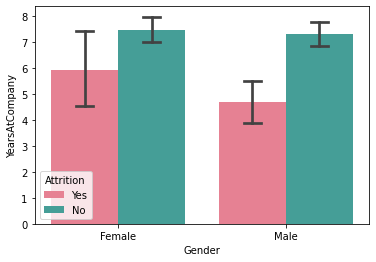

In [ ]:
sns.barplot(x='Gender', y='YearsAtCompany', data=df, hue='Attrition',capsize=0.1, palette='husl')

<br> 'Gender' is one of the factors behind attrition, it is vizualized that more female gender compared to male gender have a higher attrition bar plot.

<br> 'YearsAtTheCompany' is also another factor as it shows that the longer a person spends at this company the more they want to stay and not leave the company which indicates why the No bar is long for both genders

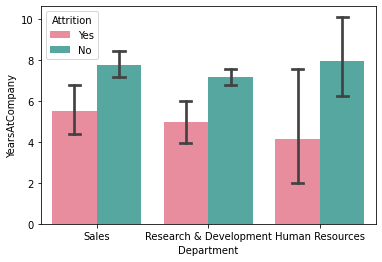

In [ ]:
sns.barplot(x='Department', y='YearsAtCompany', data=df, hue='Attrition',capsize=0.1, alpha=0.9, palette='husl')
#Here we are trying to look at the relationship between department and years at company against attrition

From the graph above it is obvious that sales department has a higher attrition than other departments in the company.

**What is the relationship between Education and Monthly Income?**

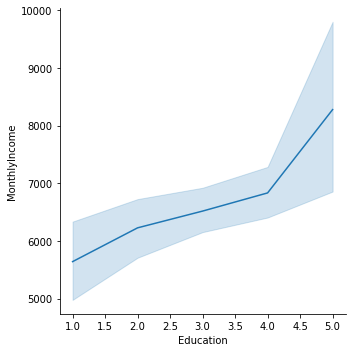

In [ ]:
sns.relplot(x='Education', y='MonthlyIncome', data=df, kind='line')

<br> The higher the education level of a person in this company the higher their income which is shown by the upward sloping line.

<br> People with '5- Doctor' education have the most income earned, while the lowest income earned is by those with '1 - below college' education

**Lets change the value of Attrition from 'Yes' to 1 and 'No' to 0 to aid further numerical analysis with Attrition column**

In [ ]:
attrition_map ={'Yes':1, 'No':0}
df['Attrition'] = df['Attrition'].map(attrition_map) 

#To change attrition from catagorical data to numerical data

In [ ]:
df.head() #to confirm the change we made above

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## What is the effect of age on attrition?

Text(0.5, 1.0, 'KDE Plot of Age on Attrition')

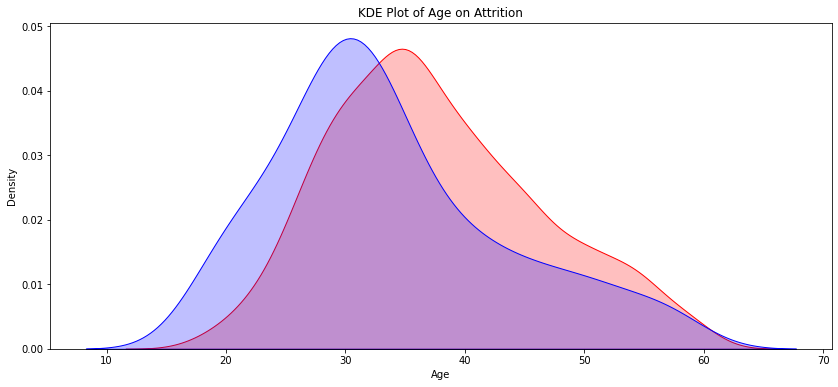

In [20]:
fig = plt.figure(figsize=(14,6))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'Age'] , color='red',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'Age'] , color='blue',shade=True, label='Yes')
plt.title('KDE Plot of Age on Attrition')

#Age is on the x axis, while Attrition are the two kde plots, yes is blue, while no is red

<br> The effect of Age on Attrition shows that the YES attributes is peaked at the age of 30 and continues to drop after that age, which means people below the age of 30 leave the company the most.

<br> While the No  peaks mid 30 and above where there are more older people that chooses to stay in the company and that explains why they fall in the No category

###Is Income the main factor in employee attrition?

In [21]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

#This is to get columns that are numerical(Attrition column shows as numerical due to the conversion we made earlier)

Index(['id', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
cat_features = df.select_dtypes(include=[np.object])
cat_features.columns

#This is to view data that are categorical

<ipython-input-22-6753f6778cad>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = df.select_dtypes(include=[np.object])


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [23]:
numerical_features = df.select_dtypes(include=[np.number])
correlation_att = numerical_features.corr()
print(correlation_att['Attrition'].sort_values(ascending = False), '\n')

#Correlation of Attrition with other factors including MonthlyIncome, and Monthly Income has a negative correlation of -0.159840 with attrition from this correlation analysis.

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
id                         -0.010369
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
S

Lets drop columns that are not useful, 'EmployeeCount', 'StandardHours' and 'id' because EmployeeCount and StandardHours have a constant number and it is not useful.

In [24]:
df.drop(['EmployeeCount','StandardHours','id'], axis=1, inplace=True)
df.columns #This is to drop columns we dont need and display the new columns we need

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Let's re-run the correlation with useful columns

In [25]:
numerical_features = df.select_dtypes(include=[np.number])
correlation_att = numerical_features.corr()
print(correlation_att['Attrition'].sort_values(ascending = False), '\n')

#Correlation of Attrition with other numerical values.

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64 



Index(['Attrition', 'DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate',
       'PerformanceRating', 'HourlyRate', 'EmployeeNumber',
       'PercentSalaryHike', 'Education', 'YearsSinceLastPromotion',
       'RelationshipSatisfaction'],
      dtype='object')


Text(0.5, 1, 'Heatmap of Attrition With Other Factors')

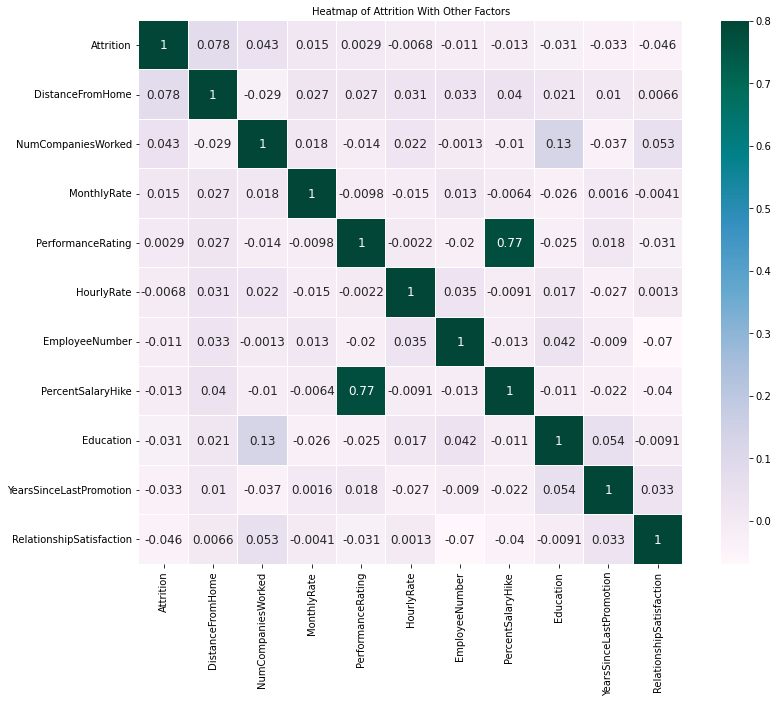

In [26]:
k = 11
cols = correlation_att.nlargest(k, 'Attrition')['Attrition'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize = (14,10))
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True,cmap='PuBuGn', linecolor='white',xticklabels=cols.values, annot_kws ={'size':12}, yticklabels=cols.values)
plt.title('Heatmap of Attrition With Other Factors', y=1, size=10)

#Heatmap of Attrition with variables

From the heatmap above, monthly income has no relationship with Attrition, and if we were to analyze factors that has a strong relationship with Attrition, we will start with 'DistanceFromHome' because it has the closest correlation to attrition.

## **How does work-life balance impact the overall attrition rate?**



In [27]:
df.Attrition.value_counts(1) 
#to get the rate for Attrition. 0 - 83.8%, 1 - 16.1%

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [28]:
df.WorkLifeBalance.value_counts() 
#The group count of WorkLifeBalance ratings, the higest is 3 which means 'Better' according to data meaning

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

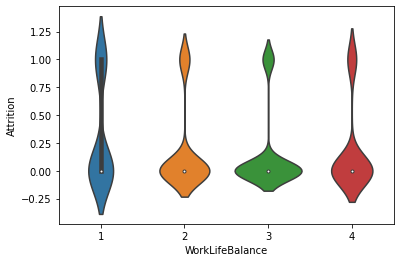

In [29]:
sns.violinplot(x='WorkLifeBalance', y='Attrition', data=df)
#violin plot that shows the distribution of 'Attrition' with 'WorkLifeBalance'

<br> The rate of attrtion for Yes is 16.1%, while the rate for No is 83.9%, and the distribution between both rates are displayed in the violin plot above.

<br> On the Y-axis, Attrition 1 - Yes, has a thinner distribution than 0 - No which has a wider distribuition.

<br> The X-axis explains the rating of WorkLifeBalance and 3 has the widest plot for No of 83.9%, which shows the people with best worklifebalance rating are still in the company and people with '1 - bad' worklifebalance rating   